# Lab 3 MA course in Artificial Intelligence 2020/2021



In [1]:
!rm -r AI2020
!git clone https://github.com/UmbertoJr/AI2020.git

Cloning into 'AI2020'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 407 (delta 3), reused 8 (delta 3), pack-reused 399
Receiving objects: 100% (407/407), 639.42 KiB | 4.92 MiB/s, done.
Resolving deltas: 100% (249/249), done.


# Iterated Local Search for the Travelling Salesman Problem

Let's read the standard TSP instance called 'd198.tsp'

name: d198
nPoints: 198
best_sol: 15780.0


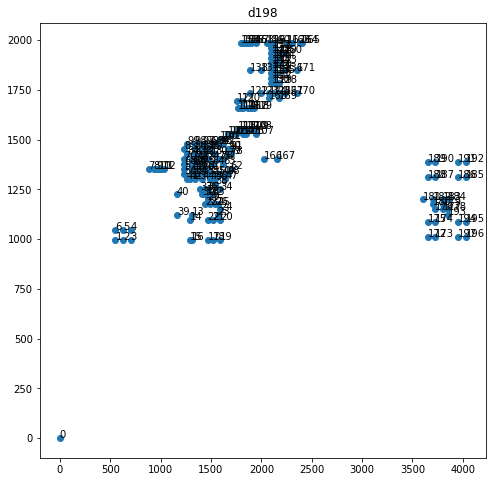

In [2]:
from AI2020.IO_manager.io_tsp import TSP_Instance_Creator

ic = TSP_Instance_Creator("standard", 'd198.tsp') 
ic.print_info()
ic.plot_data()

## 2-opt

Here is an example of how to use our black-box 2-opt implementation

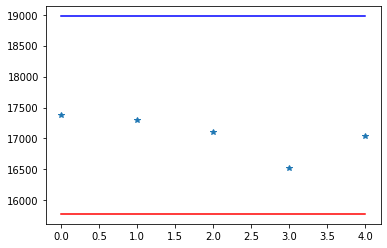

best gap with NN 20.25% on 1 tial,
with a total time of 0.005 seconds
best gap with random + 2opt 4.75% on 5 tials,
with a total time of 5.55 seconds


In [6]:
import numpy as np
from time import time as t
import matplotlib.pyplot as plt


from AI2020.solvers.local_search import TwoOpt
from AI2020.solvers.TSP_solver import Solver_TSP
from AI2020.solvers.constructive_algorithms import random_initializer, nearest_neighbor
# if you are running from your local remove the prefix AI2020 (comment the previous 3 line and uncomment the following 3 line)
# from solvers.local_search import TwoOpt
# from solvers.TSP_solver import Solver_TSP
# from solvers.constructive_algorithms import random_initializer, nearest_neighbor

def my_local_search(solution, dist_matrix):
  new_solution, _ = TwoOpt.local_search(solution, dist_matrix)
  return new_solution, 1


number_of_trials = 5
found_lens = []
start = t()
solver = Solver_TSP(('random', random_initializer.random_method))
solver.bind(('my local search', my_local_search ))

for _ in range(number_of_trials):
  solver(ic)
  found_lens.append(solver.found_length)
end = t()

solver = Solver_TSP(('nearest neighbor', nearest_neighbor.nn))
solver(ic)

plt.plot(found_lens, "*")
plt.plot(np.ones(number_of_trials)*ic.best_sol, "r-")
plt.plot(np.ones(number_of_trials)*solver.found_length, "b-")
plt.show()
print(f"best gap with NN {solver.gap}% on 1 tial,\nwith a total time of {np.round(solver.time_to_solve, 5)} seconds")
print(f"best gap with random + 2opt {np.round(100*(min(found_lens) - ic.best_sol)/ic.best_sol, 2)}% on {number_of_trials} tials,\nwith a total time of {np.round(end - start, 2)} seconds")


## Double Bridge

Here you need to implement your own Double Bridge permutation!

In [8]:
class DoubleBridge:
  
  @staticmethod
  def perturbate_solution(solution):
    ### to fill
    return new_solution

## Iterated Local Search


Here you need to implement the three variants of the ILS we saw in class

In [9]:
class ILS_better:
  def solve(solution, matrix):
    calls = 1
    return solution, calls

class ILS_RW:
  def solve(solution, matrix):
    calls = 1
    return solution, calls

class ILS_LSMC:
  def solve(solution, matrix):
    calls = 1
    return solution, calls


### Example of Table

Take care that you need to change the code in order to satisfy the requirements for the task! 

In [11]:
import pandas as pd
verbose = False
show_plots = False


names = ["eil76.tsp"] #"d198.tsp" , "kroA100.tsp"
initializers = ["random"] 
init_functions = [random_initializer.random_method]
improvements = ["ILS better","ILS RW","ILS LSMC"]
improve_functions = [ILS_better.solve, ILS_RW.solve, ILS_LSMC.solve]
results = []
index = []
for name in names:
  instance = TSP_Instance_Creator("standard", name)
  for i, init in enumerate(initializers):
    for j, improve in enumerate(improvements):
      solver = Solver_TSP((init, init_functions[i]))
      solver.bind((improve, improve_functions[j]))
      solver(instance)
      index.append((name, instance.best_sol, solver.name_method))
      results.append([solver.found_length, solver.gap, solver.time_to_solve, solver.ls_calls])
          

index = pd.MultiIndex.from_tuples(index, names=['problem','optimal lenght', 'method'])

pd.DataFrame(results, index=index, columns=["tour length", "gap", "time to solve", "calls Local Search"])

tour length  ...  calls Local Search
problem   optimal lenght method                                                          ...                    
eil76.tsp 538.0          initialized with random, improved with ILS better       2422.0  ...                   1
                         initialized with random, improved with ILS RW           2543.0  ...                   1
                         initialized with random, improved with ILS LSMC         2430.0  ...                   1

[3 rows x 4 columns]